# Problem statement
**The objective is to analyze the flight booking dataset obtained from a platform which is used to book flight tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers. Apply EDA,statistical methods and Machine learning algorithms in order to get meaningful information from it.

**Dataset: Flight booking price prediction dataset contains around 3 lacs records with 11 attributes .


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
df = pd.read_csv("Flight_Booking.csv")
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [8]:
df = df.drop(columns=["Unnamed: 0"])
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [11]:
print(df.shape)
print(df.describe())
print(df.info())


(300153, 11)
            duration      days_left          price
count  300153.000000  300153.000000  300153.000000
mean       12.221021      26.004751   20889.660523
std         7.191997      13.561004   22697.767366
min         0.830000       1.000000    1105.000000
25%         6.830000      15.000000    4783.000000
50%        11.250000      26.000000    7425.000000
75%        16.170000      38.000000   42521.000000
max        49.830000      49.000000  123071.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non

In [12]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

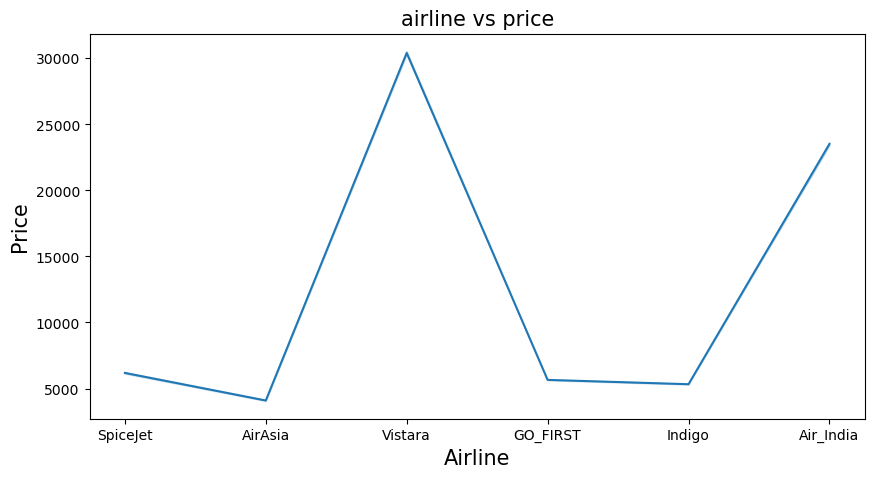

In [18]:
plt.figure(figsize=(10,5)) #There is a variation in price with different airlines
sns.lineplot(x=df['airline'], y=df['price'])
plt.title('airline vs price' , fontsize = 15)
plt.xlabel('Airline', fontsize = 15)
plt.ylabel('Price' , fontsize =15)
plt.show()

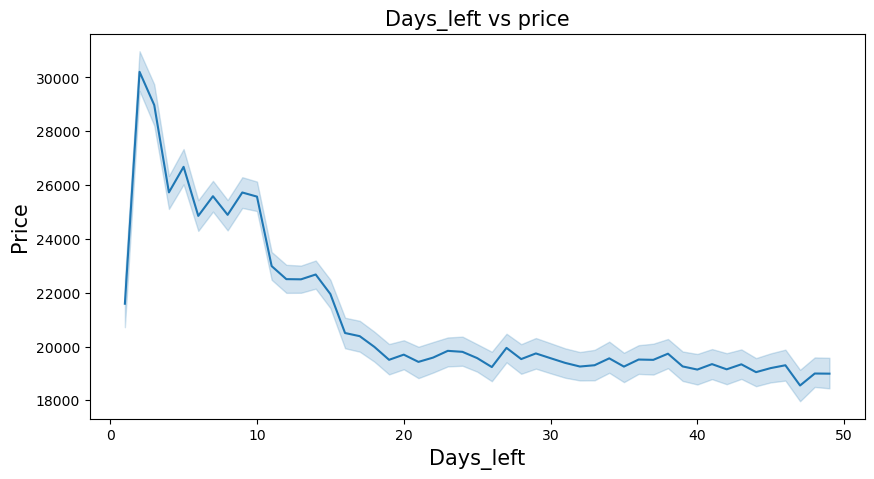

In [20]:
#The price of the ticket increases as the days left for departure decreases 

plt.figure(figsize=(10,5)) 
sns.lineplot(x=df['days_left'], y=df['price'])
plt.title('Days_left vs price' , fontsize = 15)
plt.xlabel('Days_left', fontsize = 15)
plt.ylabel('Price' , fontsize =15)
plt.show()

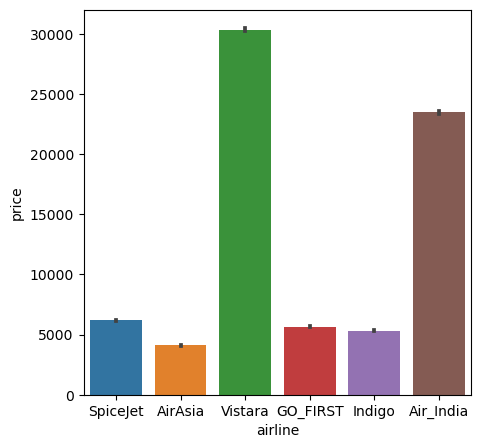

In [25]:
#Price range of all the flights

plt.figure(figsize=(5,5)) 
sns.barplot(x=df['airline'] , y=df['price'])
plt.show()

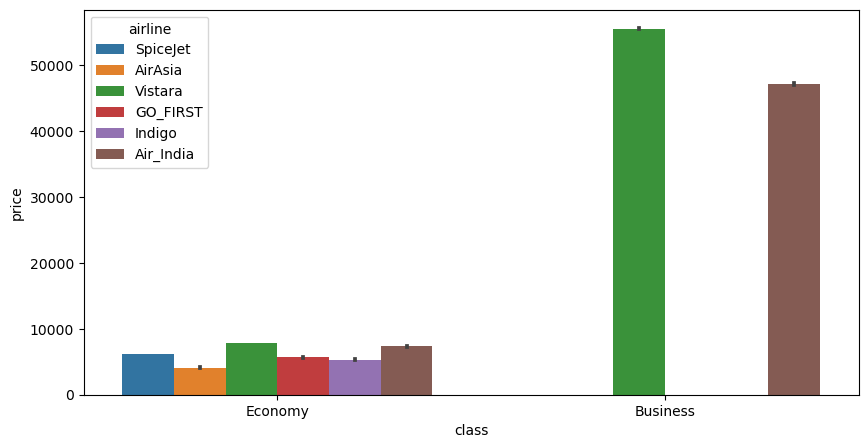

In [27]:
# Range of price of all the flights of Economy and Business class

plt.figure(figsize=(10,5))
sns.barplot(x=df['class'] , y=df['price'] , hue=df['airline'])
plt.show()

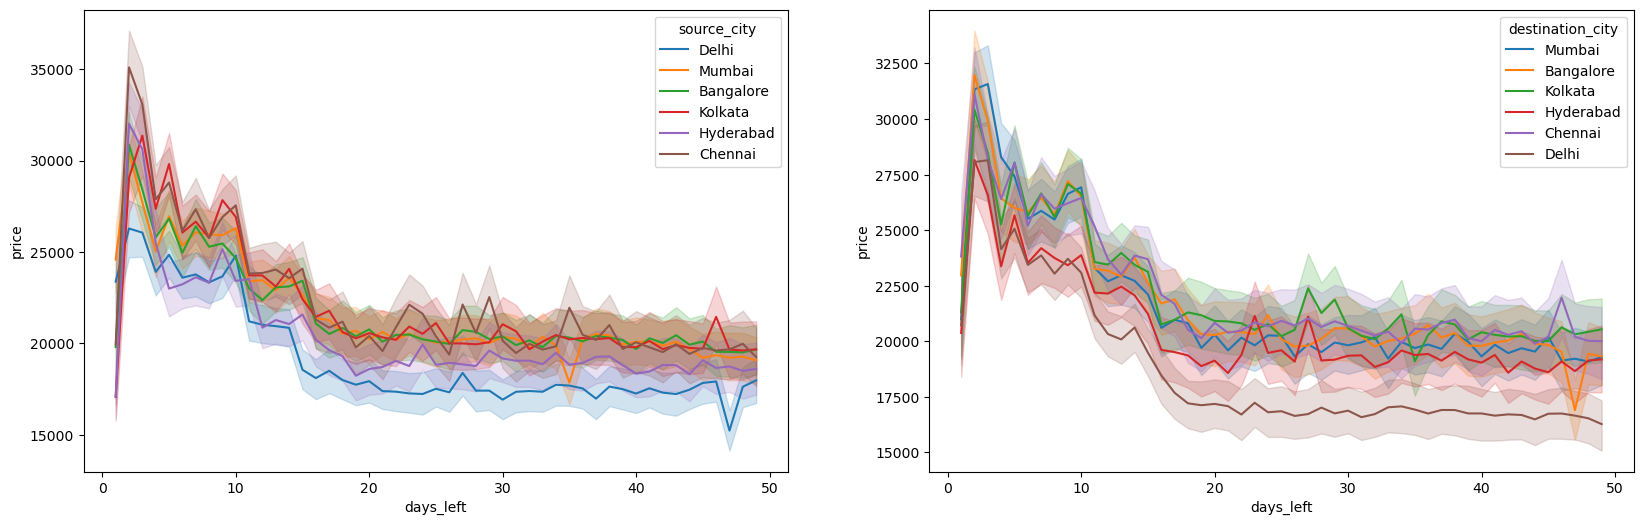

In [40]:
#Range of price of flights with source and destination city according to the days left

fig, ax = plt.subplots(1, 2, figsize=(20, 6))
sns.lineplot(x=df['days_left'] , y = df['price'] , hue=df['source_city'] , ax=ax[0])
sns.lineplot(x=df['days_left'] , y = df['price'], hue=df['destination_city'] , ax=ax[1])
plt.show()


In [42]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB
None


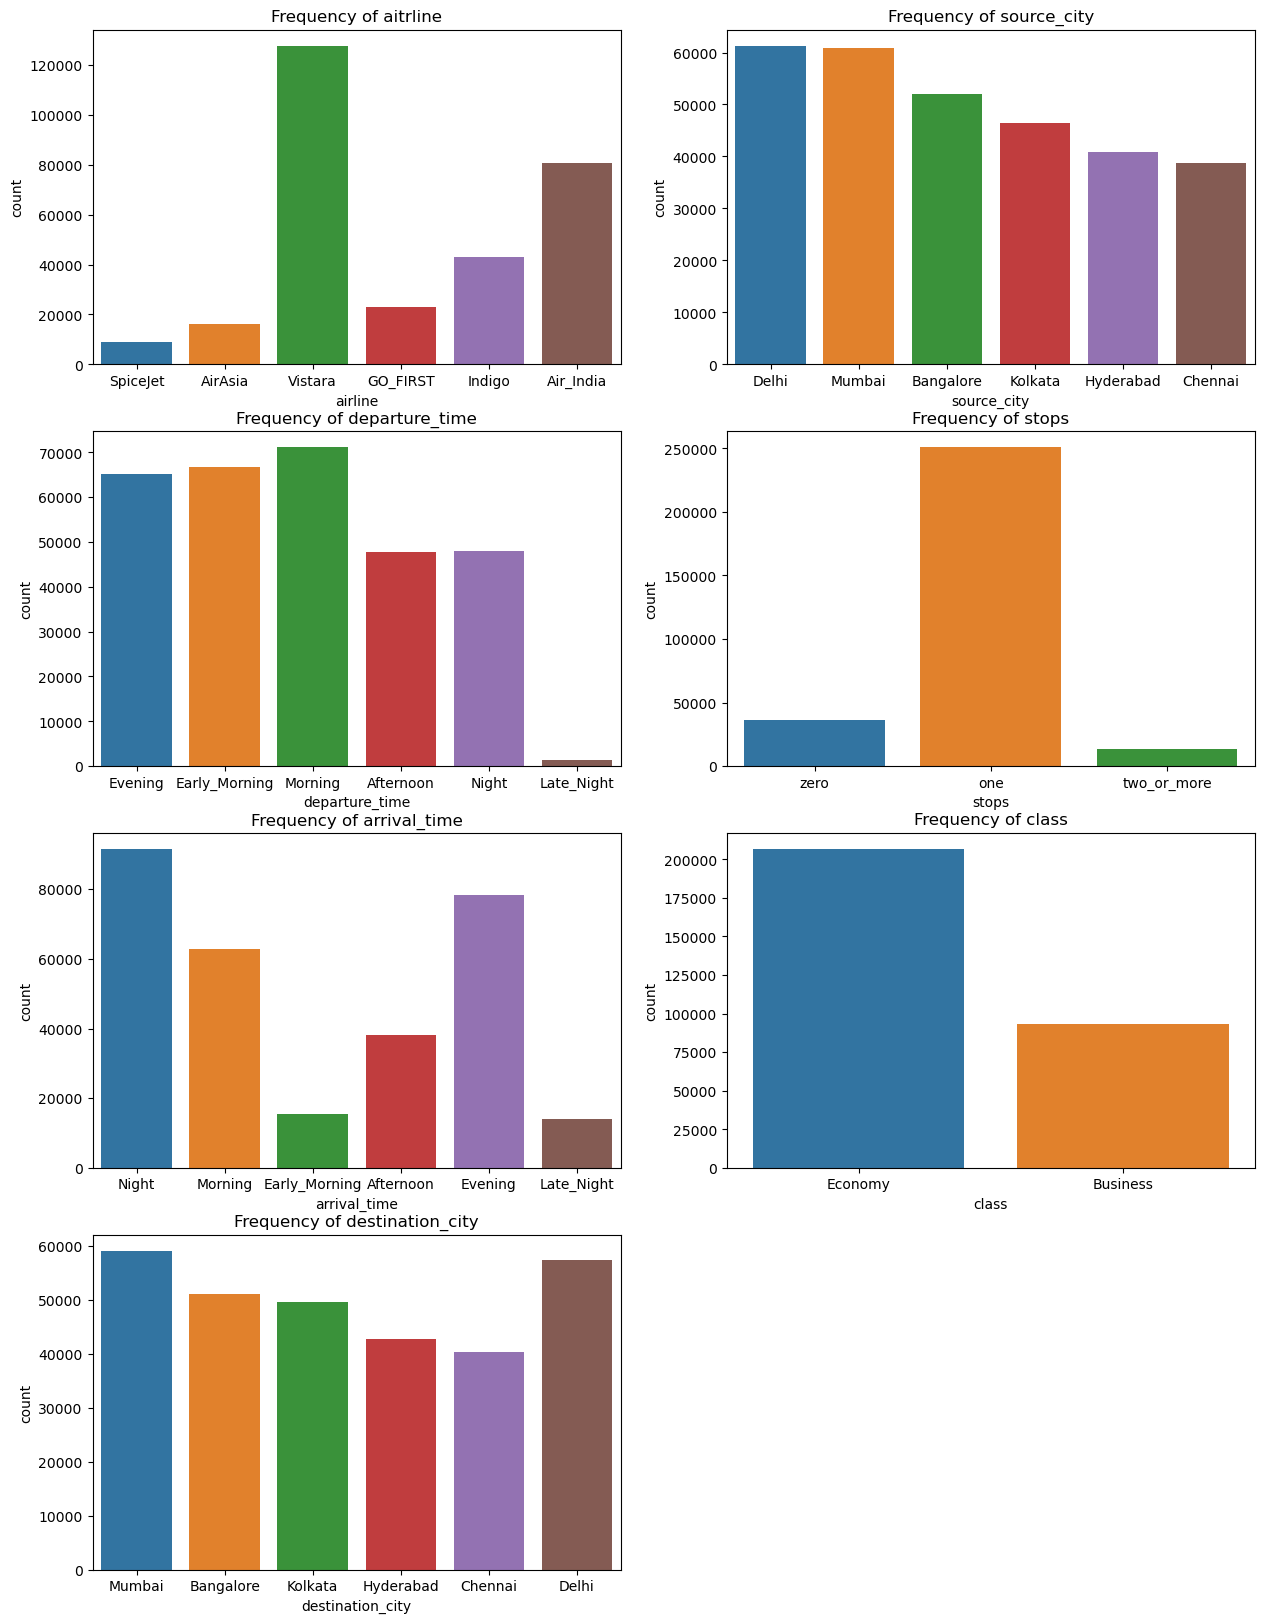

In [43]:
# Visualization of categorical features with countplot

plt.figure(figsize=(15,20))

plt.subplot(4,2,1)
sns.countplot(x=df['airline'] , data=df)
plt.title('Frequency of aitrline')


plt.subplot(4,2,2)
sns.countplot(x=df['source_city'] , data=df)
plt.title('Frequency of source_city')

plt.subplot(4,2,3)
sns.countplot(x=df['departure_time'] , data=df)
plt.title('Frequency of departure_time')


plt.subplot(4,2,4)
sns.countplot(x=df['stops'] , data=df)
plt.title('Frequency of stops')


plt.subplot(4,2,5)
sns.countplot(x=df['arrival_time'] , data=df)
plt.title('Frequency of arrival_time')


plt.subplot(4,2,6)
sns.countplot(x=df['class'] , data=df)
plt.title('Frequency of class')


plt.subplot(4,2,7)
sns.countplot(x=df['destination_city'] , data=df)
plt.title('Frequency of destination_city')

plt.show()

In [44]:
# Performing One Hot Encoding for categorical features of a dataframe

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['airline'] = le.fit_transform(df['airline'])

df['source_city'] = le.fit_transform(df['source_city'])

df['departure_time'] = le.fit_transform(df['departure_time'])

df['stops'] = le.fit_transform(df['stops'])

df['arrival_time'] = le.fit_transform(df['arrival_time'])

df['class'] = le.fit_transform(df['class'])

df['destination_city'] = le.fit_transform(df['destination_city'])

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int32  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(7), int64(2), object(1)
memory usage: 17.2+ MB


C:\Users\deepa\AppData\Local\Temp\ipykernel_17448\128793559.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr() , annot=True, cmap="coolwarm")


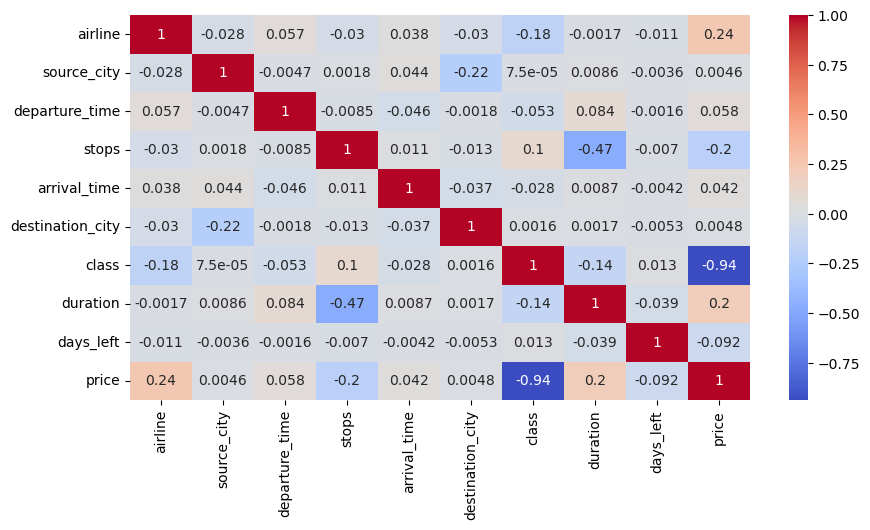

In [46]:
# Plotting the correlation graph to see the correlation between features and dependent variable.

plt.figure(figsize=(10,5))
sns.heatmap(df.corr() , annot=True, cmap="coolwarm")
plt.show()

In [48]:
# Selecting the features using VIF. VIF should be less than 5. So drop the stops feature.

from statsmodels.stats.outliers_influence import variance_inflation_factor

col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'price')):
        col_list.append(col)

x = df[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i)
                      for i in range(len(x.columns))]
print(vif_data)


            feature       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


In [ ]:
# Dropping the stops column. All features are having VIF less than 5.

In [49]:
df = df.drop(columns=['stops'])

col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'price')):
        col_list.append(col)

x = df[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i)
                      for i in range(len(x.columns))]
print(vif_data)


            feature       VIF
0           airline  3.370020
1       source_city  2.895803
2    departure_time  2.746255
3      arrival_time  3.632792
4  destination_city  2.857808
5             class  2.776721
6          duration  3.429344
7         days_left  3.950132


In [77]:
# Applying standardization and implementing Linear Regression Model to predict the price of a flight

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression



In [78]:
print(df.dtypes)

airline               int32
flight               object
source_city           int32
departure_time        int32
arrival_time          int32
destination_city      int32
class                 int32
duration            float64
days_left             int64
price                 int64
dtype: object


In [79]:
X = df.drop(columns=["price"])
y = df["price"]

In [80]:
print(X.dtypes)

airline               int32
flight               object
source_city           int32
departure_time        int32
arrival_time          int32
destination_city      int32
class                 int32
duration            float64
days_left             int64
dtype: object


In [81]:
print(y.dtypes)

int64


In [83]:
X = df.drop(columns=['flight'])
print(X.dtypes)

airline               int32
source_city           int32
departure_time        int32
arrival_time          int32
destination_city      int32
class                 int32
duration            float64
days_left             int64
price                 int64
dtype: object


In [85]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

print(x_train.dtypes)

airline               int32
source_city           int32
departure_time        int32
arrival_time          int32
destination_city      int32
class                 int32
duration            float64
days_left             int64
price                 int64
dtype: object


In [87]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [90]:
model = LinearRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

diff = pd.DataFrame(np.c_[y_test,y_pred], columns=["Actual_Values" , "Predicted_Values"])

print(diff)

       Actual_Values  Predicted_Values
0             3961.0            3961.0
1             5102.0            5102.0
2            12308.0           12308.0
3             4099.0            4099.0
4             4637.0            4637.0
...              ...               ...
60026         3010.0            3010.0
60027        41101.0           41101.0
60028        41314.0           41314.0
60029        57565.0           57565.0
60030         5178.0            5178.0

[60031 rows x 2 columns]


In [96]:
from sklearn.metrics import r2_score , mean_absolute_percentage_error
from sklearn import metrics

r2_score(y_test,y_pred)
mean_abs_error = metrics.mean_absolute_error(y_test,y_pred)
print(mean_abs_error)

mean_absolute_percentage_error(y_test,y_pred)

mean_sq_error = metrics.mean_squared_error(y_test,y_pred)
print(mean_sq_error)

root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(root_mean_sq_error)


1.615472635734361e-10
3.6245441776781225e-20
1.9038235678964903e-10


C:\Users\deepa\AppData\Local\Temp\ipykernel_17448\2777352035.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label="Actual")
C:\Users\deepa\AppData\Local\Temp\ipykernel_17448\2777352035.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label="Predict")


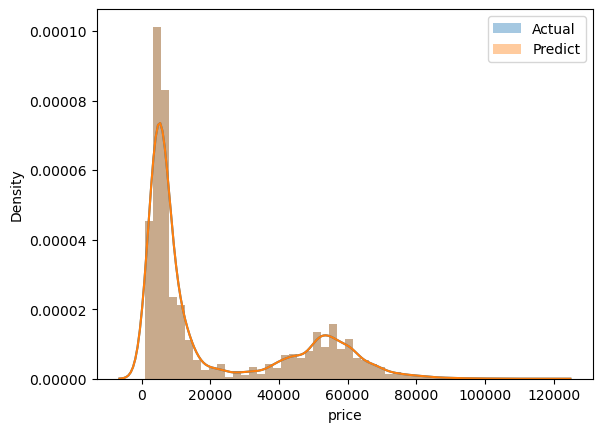

In [99]:
# Plotting the graph of actual and predicted price of flight
sns.distplot(y_test, label="Actual")
sns.distplot(y_pred, label="Predict")
plt.legend()

In [106]:
# Mean absolute percentage error is 7.7 percent and RMSE is 3620 which is less than the linear regression model
# Decision Tree Regressor 
#Random Forest Regressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error


dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)

mean_abs_error = metrics.mean_absolute_error(y_test,y_pred)
print(mean_abs_error)

mean_absolute_percentage_error(y_test,y_pred)
mean_sq_error = metrics.mean_squared_error(y_test,y_pred)
print(mean_sq_error)

root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(root_mean_sq_error)

0.3064250137428995
201.9470440272526
14.210807296816483


In [ ]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train )
y_pred = rfr.predict(x_test)
r2_score(y_test,y_pred)


mean_abs_error = metrics.mean_absolute_error(y_test,y_pred)
print(mean_abs_error)

mean_absolute_percentage_error(y_test,y_pred)
mean_sq_error = metrics.mean_squared_error(y_test,y_pred)
print(mean_sq_error)

root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(root_mean_sq_error)

sns.distplot(y_test, label="Actual")
sns.distplot(y_pred, label="Predict")
plt.legend()